- 문제를 정확하게 정의
# K 최근접 이웃 회귀 알고리즘

**회귀 분석(Regression Analysis)**
- 전통적인 통계분석에서 많이 사용하는 예측 방법
- 데이터의 연속적인 흐름을 파악해 입력이 들어왔을 때 float 형태의 값을 예측하는 것
- 즉, 데이터의 분포가 하나의 선 또는 면 안에 표현될 수 있는 최적의 모델을 찾는 것
- 모델(가설)을 정의한 후 비용함수(Cost Function)로 실제값과 예측값의 오차를 구한 뒤 이를 최적화하며 진행하는 알고리즘

**모델(가설)**
1. 선형회귀(Linear Regression)
- 일반적으로 널리 사용되는 대표적인 회귀 알고리즘
- 종속변수 y와 하나의 독립변수 X와의 선형 상관관계를 모델링하는 기법
- 함수식 : y = wX + b
- 특성(입력값)이 하나인 모델

2. 다중 선형 회귀(Multiple Linear Regrssion)
- 함수식 : y = w1X1 + w2X2 + w3X3 + b
- 여러 특성(입력값)을 사용하는 모델

3. 속성
- w(weight)는 가중치, b(bias)는 절편, 편향값을 의미
- w와 b의 값에 따라 선 또는 면의 모양이 달라진다.

# 필요한 라이브러리 로딩

In [2]:
!pip install mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 10.9 MB/s eta 0:00:00


In [4]:
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mglearn

# 필요 데이터셋 로딩

In [26]:
# 생선의 길이와 무게를 가지고 있는 데이터 셋
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

## 분류 및 예측을 위한 알고리즘

1. Model_based Learning(모델 기반 학습)
- 데이터로부터 모델을 생성하여 분류/예측을 진행한다.
- 선형/비선형 모델(Linear Regression, Logistic Regression)
- Neural Network(신경망)
- 의사결정나무(Decision Tree)
- SVM(Support Vector Machine)
- etc.

2. Instance_based Learning(사례 기반 학습,  데이터 기반 학습)
- 별도의 모델 생성없이 데이터베이스에 있는 자료들을 분류/예측에 사용한다.
- 각각의 관측기만을 이용하여 새로운 데이터에 대한 예측을 진행한다.
- 대표적인 알고리즘 knn 알고리즘

# 데이터의 탐색 및 시각화

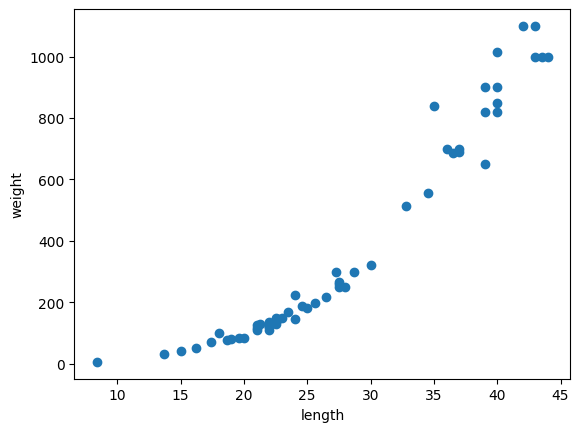

In [6]:
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

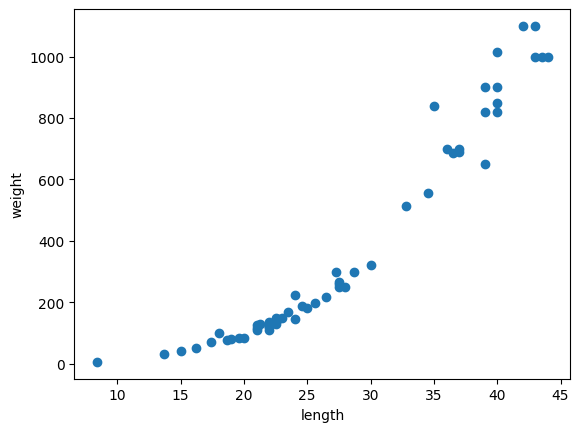

In [10]:
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 데이터 가공
- 훈련데이터와 테스트데이터로 분리하는 작업

In [27]:
from sklearn.model_selection import train_test_split
# test_size : 25% default
x_train, x_test, y_train, y_test = train_test_split(perch_length, perch_weight, random_state=42)

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(42,) (42,) (14,) (14,)


- scikit-learn으로 학습을 수행하려면 feature들이 행렬(2차원 배열)로 target은 vector(1차원 배열) 구성되어야 한다.

In [28]:
arr = np.array([1, 2, 3, 4])
arr.shape

(4,)

In [29]:
t = arr.reshape(2,2)
t.shape

(2, 2)

In [39]:
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

# 모델 선택 및 모델 훈련

In [40]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(x_train, y_train)

KNeighborsRegressor()

## 결정계수(R2)

- 회귀모델일 경우 결정계수가 도출된다.
- 결정계수(Coefficient of determination) : 모델의 설명력
- 1- (실제값 - 예측값)의 제곱들의 합 / (실제값 - 평균)의 제곱들의 합으로 나눈 결과값

In [41]:
knr.score(x_test, y_test)

0.992809406101064

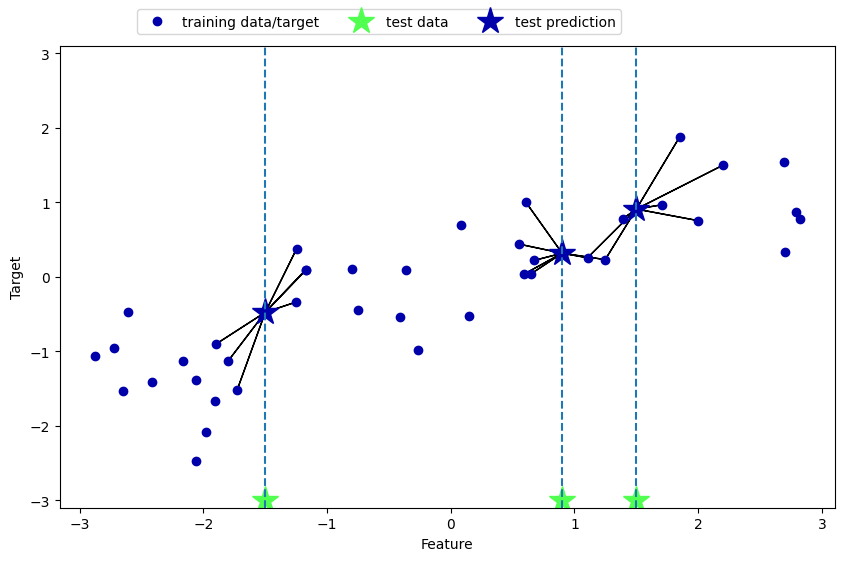

In [49]:
mglearn.plots.plot_knn_regression(n_neighbors= 7)

In [50]:
# MAE : 실제값과 예측값의 오차의 절대값을 평균하여 반환하는 함수
test_prec = knr.predict(x_test)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, test_prec)
mae

19.157142857142862

- 평균적으로 19g 정도 실제값과 차이가 있음을 알 수 있다.

## 과소적합 vs. 과대적합

- 과대적합 : 훈련데이터의 성능이 월등히 뛰어난 상황
- 과소적합 : 훈련데이터와 테스트데이터의 성능이 둘 다 좋지 않을 때, 테스트 데이터의 성능이 월등이 뛰어날 때

In [51]:
# 훈련 데이터의 결정계수를 추출
knr.score(x_train, y_train)

0.9698823289099254

- 과소적합이 발생했다.
- 모델을 조금 더 복잡하게 만들면 된다.
- knn에서 모델을 복잡하게 만드는 첫번째 방법으로 이웃 수를 줄인다.

In [57]:
# 모델을 복잡하게 만들기 위해 이웃 수를 3을 줄인다.
knr.n_neighbors = 3

# 모델을 다시 학습시킨다.
knr.fit(x_train, y_train)
knr.score(x_train, y_train)

0.9804899950518966

In [58]:
knr.score(x_test, y_test)

0.9746459963987609

- 일반즉으로 과대적합과 과소적합이 발생하는 이유중 하나는 데이터셋의 크기가 매우 작기 때문이다.

In [59]:
knr.score(x_test, y_test)

0.9746459963987609

# k-최근접 이웃 회귀모델의 한계
- 새로운 데이터를 통한 모델 평가
- 길이가 100인 생선의 무게를 예측

In [60]:
knr.predict([[100]])

array([1033.33333333])

In [61]:
# 길이가 50인 생선의 무게 예측
knr.predict([[50]])

array([1033.33333333])

- 길이가 100인 생선과 길이가 50인 생선의 무게가 동일하다.
- 일반적으로 길이가 길면 무게가 더 나가야한다.
- 과장해서 길이를 1000으로 예측해도 결과는 1033g이 나온댜.
- 훈련 셋의 범위를 많이 벗어나는 샘플을 예측하는 경우 정확하게 예측하는 어려운 한계를 보인다.

In [ ]:
from sklearn.model_selection import

In [ ]:
# 길이가 50cm인 생선의 이웃수를 추출
distances, indexes = knr.kneighbors([[50]])

plt.scatter(perch_length, perch_weight)
plt.scdatter(x_train[indexes], )
plt.xlabel('length')
plt.ylabel('weight')
plt.show()